# GC Service Inventory Dataset Exploration

In this notebook, we explore the Service Inventory dataset provided by the Government of Canada on their [Open Government website](https://open.canada.ca/data/en/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c). In particular, we download the dataset referred to as *Service Identification Information & Metrics (2016-2019)* on the aforementioned website, and we interpret the columns and their values according to the specifications provided in the *Data Element Profile* (English) document. Our goal is describing as many important features of the data that we notice within our time constraint.

# Obtaining the Data

## Importing the Libraries

In [1]:
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set()

## Downloading the Dataset

In [3]:
filename_inv = "service_inventory.csv"

# download dataset from website; run only once

#url_inv = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"
#urllib.request.urlretrieve(url_inv, 'data/' + filename_inv)

## Loading and Verifying the Dataset

In [4]:
df_inv = pd.read_csv(filename_inv, na_values=[''], keep_default_na=False)

In [5]:
df_inv.head()

,Unnamed: 0,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
0,0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",...,0,NA,NA,NA,NA,NA,NA,NaN,"The use of""NA"" in the SIN column is an indica...",NaN
1,1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
2,2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
3,3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
4,4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN


In [6]:
df_inv.shape

(1865, 38)

In [7]:
df_inv.dtypes

Unnamed: 0                   int64
fiscal_yr                   object
service_id                  object
service_name_en             object
service_name_fr             object
department_name_en          object
department_name_fr          object
external_internal           object
service_type                object
special_designations        object
service_description_en      object
service_description_fr      object
service_url_en              object
service_url_fr              object
program_name_en             object
program_name_fr             object
last_GBA                    object
client_target_groups        object
info_service                object
service_fee                 object
cra_business_number         object
use_of_sin                  object
service_channels            object
online_applications         object
web_visits_info_service     object
calls_received              object
in_person_applications      object
postal_mail_applications    object
other_applications  

In [8]:
df_inv.isna().sum()

Unnamed: 0                    0
fiscal_yr                     0
service_id                    0
service_name_en               0
service_name_fr               0
department_name_en            0
department_name_fr            0
external_internal             0
service_type                  0
special_designations          0
service_description_en        0
service_description_fr        0
service_url_en              539
service_url_fr              539
program_name_en               3
program_name_fr               3
last_GBA                    853
client_target_groups          0
info_service                  0
service_fee                   0
cra_business_number           0
use_of_sin                    0
service_channels              0
online_applications           0
web_visits_info_service       0
calls_received                0
in_person_applications        0
postal_mail_applications      0
other_applications            0
e_registration                0
e_authentication              0
e_applic

# Cleaning the Data

## Helper Functions

In [9]:
def display_unique_elements(df, col):
    '''
    Display the number of missing and unique elements in the column col of a dataframe df.
    '''
    print("\n\n*** " + col.upper() + " ***")
    print("\nNUMBER OF MISSING ELEMENTS:", df[col].isna().sum())
    print("\nUNIQUE ELEMENTS:", df[col].unique())
    print("\nUNIQUE ELEMENT COUNT (DESC):")
    for idx, val in df.fillna("nan").groupby(col).size().sort_values(ascending=False).iteritems():
        print(idx, val)

## Selecting Relevant Columns

We begin by restricting the dataset to the columns that are of interest to us.

ToDo: add total_applications

In [10]:
rel_cols_inv = ['fiscal_yr', 'service_name_en', 'department_name_en', 'external_internal',
            'service_type', 'client_target_groups', 'service_fee','use_of_sin', 
            'online_applications', 'web_visits_info_service', 'calls_received',
            'in_person_applications', 'postal_mail_applications', 'other_applications',
            'e_registration', 'e_authentication', 'e_application', 'e_decision', 'e_issuance', 'e_feedback']

print('Columns removed:', df_inv.columns.difference(rel_cols_inv))
df_inv.drop(df_inv.columns.difference(rel_cols_inv), 1, inplace=True)

Columns removed: Index(['Unnamed: 0', 'client_feedback', 'cra_business_number',
       'department_name_fr', 'info_service', 'last_GBA', 'program_name_en',
       'program_name_fr', 'service_channels', 'service_description_en',
       'service_description_fr', 'service_id', 'service_name_fr',
       'service_url_en', 'service_url_fr', 'special_designations',
       'special_remarks_en', 'special_remarks_fr'],
      dtype='object')


In [11]:
df_inv.head()

,fiscal_yr,service_name_en,department_name_en,external_internal,service_type,client_target_groups,service_fee,use_of_sin,online_applications,web_visits_info_service,calls_received,in_person_applications,postal_mail_applications,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback
0,2016-2017,Farm Debt Mediation Service,Agriculture and Agri-Food Canada,extern,res,econom,N,ND,282,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1,2016-2017,AgriMarketing Program Assurance Systems,Agriculture and Agri-Food Canada,extern,res,econom,N,ND,16,0,0,0,0,0,NA,NA,Y,Y,N,N
2,2016-2017,AgriMarketing Program Market Development,Agriculture and Agri-Food Canada,extern,res,econom,N,ND,141,0,0,0,0,0,NA,NA,Y,Y,N,N
3,2016-2017,AgriInnovation Program Industry-led Research a...,Agriculture and Agri-Food Canada,extern,res,NGO,N,ND,29,0,0,0,0,0,NA,NA,Y,Y,N,N
4,2016-2017,AgriInnovation Program Enabling Commercializat...,Agriculture and Agri-Food Canada,extern,res,econom,N,ND,36,0,0,0,0,0,NA,NA,Y,Y,N,N


## Numeric Columns

In [12]:
# convert object columns to numeric data type.

numeric_columns = ['web_visits_info_service', 'calls_received', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
for col in numeric_columns:
    df_inv[col] = pd.to_numeric(df_inv[col], errors = 'coerce')

## Fiscal Year

No cleaning needs to be done.

In [13]:
display_unique_elements(df_inv, 'fiscal_yr')



*** FISCAL_YR ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['2016-2017' '2017-2018' '2018-2019']

UNIQUE ELEMENT COUNT (DESC):
2018-2019 1180
2016-2017 347
2017-2018 338


## Department Name

In [14]:
display_unique_elements(df_inv, 'department_name_en')



*** DEPARTMENT_NAME_EN ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['Agriculture and Agri-Food Canada' 'Canada Border Services Agency'
 'Canadian Food Inspection Agency'
 'Immigration, Refugees and Citizenship Canada' 'Canada Revenue Agency'
 'Canada School of Public Service'
 'Employment and Social Development Canada'
 'Innovation, Science and Economic Development Canada'
 'Public Services and Procurement Canada' 'Shared Services Canada'
 'Veterans Affairs Canada' 'Fisheries and Oceans Canada'
 'Crown-Indigenous Relations and Northern Affairs Canada'
 'Transport Canada' 'Public Health Agency of Canada'
 'Office of the Superintendent of Financial Institutions Canada'
 'Department of Indigenous Services' 'Public Safety Canada'
 'Global Affairs Canada' 'Western Economic Diversification Canada'
 'The National Battlefields Commission'
 'Immigration and Refugee Board of Canada' 'Health Canada'
 'Environment and Climate Change Canada' 'Correctional Service Canada'
 'Canadian Trans

## E_ Columns: 3.27 – 3.32

No cleaning needs to be done.

In [15]:
e_columns = ['e_registration', 'e_authentication', 'e_application', 'e_decision', 'e_issuance', 'e_feedback']

for col in e_columns:
    display_unique_elements(df_inv, col)



*** E_REGISTRATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
NA 726
Y 575
N 564


*** E_AUTHENTICATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 691
NA 641
Y 533


*** E_APPLICATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 725
Y 581
NA 559


*** E_DECISION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 783
Y 547
NA 535


*** E_ISSUANCE ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'N' 'Y']

UNIQUE ELEMENT COUNT (DESC):
N 723
NA 647
Y 495


*** E_FEEDBACK ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'N' 'Y']

UNIQUE ELEMENT COUNT (DESC):
Y 749
N 739
NA 377


## External Service or Internal Enterprise Service: 3.4

In [16]:
display_unique_elements(df_inv, 'external_internal')



*** EXTERNAL_INTERNAL ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['extern' 'enterprise' 'extern,enterprise' 'extern,enterprise,intern'
 'extern,intern' 'enterprise,intern' 'intern,extern' 'intern'
 'enterprise,extern,intern' 'enterprise,extern' 'intern,enterprise,extern'
 'extern,intern,enterprise']

UNIQUE ELEMENT COUNT (DESC):
extern 1461
enterprise 220
extern,enterprise 136
extern,intern 18
extern,enterprise,intern 9
intern 6
enterprise,extern 6
enterprise,intern 5
intern,extern 1
intern,enterprise,extern 1
extern,intern,enterprise 1
enterprise,extern,intern 1


The three values `Ex`, `IN`, and `EI` from the Document Element Profile for *external service*, *internal enterprise servie*, and *external/internal enterprise servie* are adopted.

In [17]:
def translate_to_EI(val):
    if val == 'extern':
        return 'EX'
    elif val in ['enterprise', 'intern', 'enterprise,intern']:
        return 'IN'
    else:
        return 'EI'

In [18]:
df_inv.external_internal = df_inv.external_internal.map(translate_to_EI)
display_unique_elements(df_inv, 'external_internal')



*** EXTERNAL_INTERNAL ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['EX' 'IN' 'EI']

UNIQUE ELEMENT COUNT (DESC):
EX 1461
IN 231
EI 173


## Use of Social Insurance Number

In [19]:
display_unique_elements(df_inv, 'use_of_sin')



*** USE_OF_SIN ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['ND' 'N' 'NA' 'Y']

UNIQUE ELEMENT COUNT (DESC):
NA 763
N 669
ND 345
Y 88


# Feature Engineering

In [20]:
# sum total applications

applications_inv = ['online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']

df_inv["total_applications"] = df_inv[applications_inv].sum(axis=1)

# Longitudinal EDA

The number of departments changes from year to year. For our longitudinal EDA, we restrict our attention to the departments that appear in the dataset in all fiscal years. We introduce a restriced dataframe `df_inv_long`.

In [21]:
fiscal_yrs_inv = list(df_inv.fiscal_yr.unique())

In [22]:
# number of services per department per fiscal year

dept_serv_count_dict = {}

for yr in fiscal_yrs_inv:
    dept_serv_count_dict[yr] = df_inv[df_inv['fiscal_yr'] == yr].groupby('department_name_en').size()
    
print('# OF DEPT.:')
for yr in fiscal_yrs_inv:
    print(yr, dept_serv_count_dict[yr].size)

# OF DEPT.:
2016-2017 11
2017-2018 11
2018-2019 67


In [23]:
department_name_fy_1 = set(df_inv[df_inv.fiscal_yr == '2016-2017'].department_name_en.unique())
department_name_fy_2 = set(df_inv[df_inv.fiscal_yr == '2017-2018'].department_name_en.unique())
department_name_fy_3 = set(df_inv[df_inv.fiscal_yr == '2018-2019'].department_name_en.unique())

# departments that appear in all fiscal years
department_name_cmn = list(department_name_fy_1.intersection(department_name_fy_2, department_name_fy_3))

df_inv_long = df_inv[df_inv.department_name_en.isin(department_name_cmn)]

In [24]:
df_inv_long.shape

(1034, 21)

### Helper Functions

In [25]:
def plot_long_size(df, col):
    for val in df[col].unique():
        df[df[col] == val].groupby('fiscal_yr').size().plot(label=val)
    plt.title(col)
    plt.ylabel('# of services')
    plt.legend(bbox_to_anchor=(1.01, 1))
    plt.show()

## Services

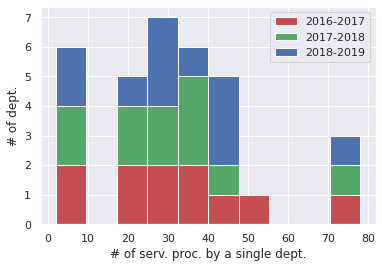

In [26]:
ss = []
for yr in fiscal_yrs_inv:
    ss.append(df_inv_long[df_inv_long['fiscal_yr'] == yr].groupby('department_name_en').size())

plt.hist(ss, stacked=True, color=['r', 'g', 'b'], label=fiscal_yrs_inv)
plt.legend()

plt.xlabel('# of serv. proc. by a single dept.')
plt.ylabel('# of dept.')

plt.show()

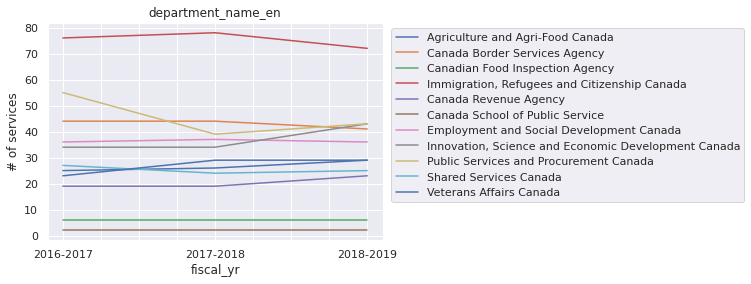

In [27]:
plot_long_size(df_inv_long, 'department_name_en')

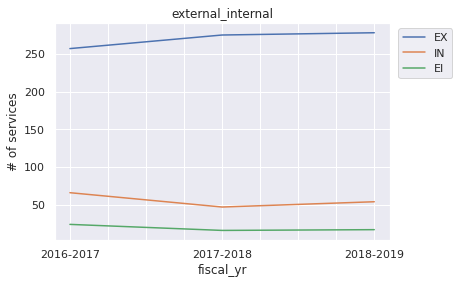

In [28]:
plot_long_size(df_inv_long, 'external_internal')

## Applications

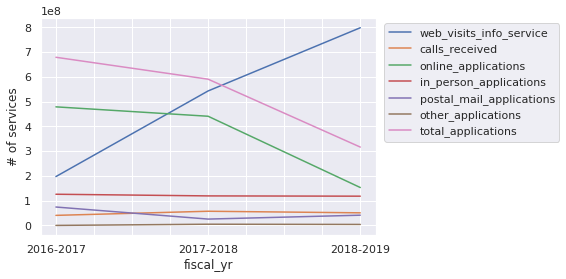

In [29]:
options = ['web_visits_info_service', 'calls_received', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications', 'total_applications']

for col in options:
    df_inv_long.groupby('fiscal_yr')[col].sum().plot(label=col)
    
plt.ylabel('# of services')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

# Cross-Sectional EDA

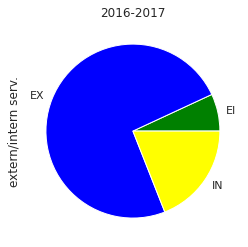

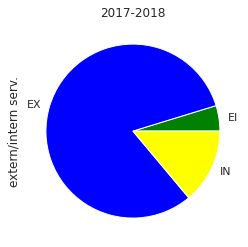

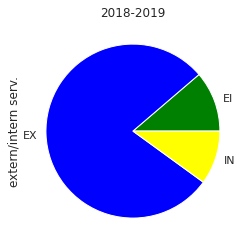

In [30]:
for yr in fiscal_yrs_inv:
    df_inv[df_inv.fiscal_yr == yr].groupby('external_internal').size().plot.pie(colors=['green', 'blue', 'yellow'], label='extern/intern serv.')
    plt.title(yr)
    plt.show()

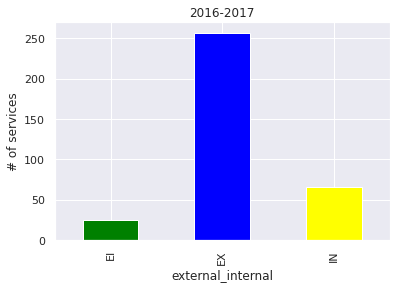

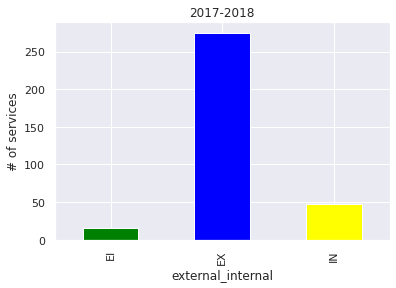

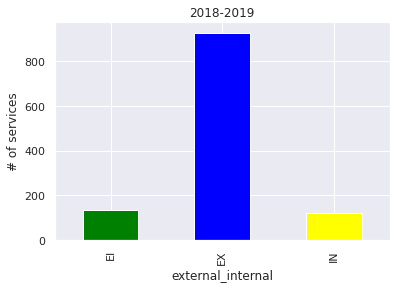

In [31]:
for yr in fiscal_yrs_inv:
    df_inv[df_inv.fiscal_yr == yr].groupby('external_internal').size().plot.bar(color=['green', 'blue', 'yellow'], label='extern/intern serv.')
    plt.title(yr)
    plt.ylabel('# of services')
    plt.show()